# Capstone Project 
Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading
chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24
states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network
of over 400 workshops by March 2018.
Mahindra would now like to leverage the data that they have and address the key issues they
have. Read along to know how you can help them improve their business.
The dataset consist of three aspects:
1. Customer data: where the details of the customer like the car owned, state and place
of residence, order type, etc are present. Data dimension is of 534000 Customer entries
2. Invoice data: where information related to customer visits and transactions are
recorded, whether a customer as insurance claims, bifurcation of the amount paid, for
what type of service did the customer came for, etc…
3. Material Inventory: where information related to what kind of service did the
customer took and what kind of material was used to service, Labor information
and the cost for the service, Plant and plant name where the customer took the
service.

In [ ]:
final_invoice = pd.read_csv('Final_invoice.csv')

### Dropping columns with more than 50% missing values

In [193]:
final_invoice.drop(['Unnamed: 0','Cash /Cashless Type','Claim No.','Expiry Date','Gate Pass Date','Insurance Company','Policy no.',
                   'Service Advisor Name'],axis=1,inplace=True)

### Dropping columns having only the number 0

In [194]:
final_invoice.drop(final_invoice.columns[[0,1,3,4,5,6,12,13,14,15,30,38,39,40,41,42,45,46,47,48]],axis=1,inplace=True)

#### Total Amt Wtd Tax and Total Value represent the same amount, because the existing in total value column are the same as the Total Amt Wtd Tax column, so we remove the Total Value column from the dataframe
#### Technician name has 48% null values, for now, dropping techinician name as not required
#### There are 40 percent NaNs in ODN No. column, the ODN No. which is present for each observation is unique, so cannot be imputed, maybe we can assign increasing serial values but for now dropping as it doesn't serve with any info

In [195]:
final_invoice.drop(['Total Value','Technician Name','ODN No.'],axis=1,inplace=True)

#### Dropping area/locality as it has 23890 missing values and removing NaN observations

In [196]:
## Removing rows containing NA values

final_invoice.dropna(axis=0,inplace=True)

## Dropping Area/Locality

final_invoice.drop(['Area / Locality'],axis=1,inplace=True)

In [197]:
final_invoice.shape

(466903, 27)

In [198]:
final_invoice_copy1 = final_invoice.copy()

#### Removing unwanted columns - Gate Pass Time,Invoice No,Invoice Time,JobCard Time,KMs Reading, Plant Name1, Print Status,User ID
#### Dropping all Totals columns except total amount

In [199]:
final_invoice.drop(['Gate Pass Time','Invoice No','Invoice Time','JobCard Time','KMs Reading','Plant Name1',
                    'Print Status','User ID','Labour Total','Misc Total','OSL Total','Parts Total','Recovrbl Exp'],
                   axis=1,inplace=True)

In [200]:
final_invoice.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Job Card No,JobCard Date,Make,Model,Order Type,Pin code,Plant,Regn No,Total Amt Wtd Tax.
0,Thane,Retail,67849,Maharashtra,2015-01-02,168303,2014-12-13,GENERAL MOTORS,SPARK,Paid Service,400601,BC01,KA19MA1291,4051.95
1,THNAE,Retail,84419,Maharashtra,2015-01-03,173997,2015-01-02,TATA MOTORS,INDICA,SMC Value Package,400603,BC01,MH43R3046,1001.29
2,THANE[W],Retail,81055,Maharashtra,2015-01-03,173889,2015-01-02,MARUTI SUZUKI,ZEN,Running Repairs,400607,BC01,AP09AX0582,233.14
3,THNAE,Retail,84419,Maharashtra,2015-01-03,174158,2015-01-03,TATA MOTORS,INDICA,SMC Redemption,400603,BC01,MH43R3046,0.00
4,THANE,Retail,18980,Maharashtra,2015-01-03,173860,2015-01-02,HYUNDAI,SANTRO XING,Paid Service,400603,BC01,MH04CD9768,2747.12


In [201]:
## There are negative values in total amount, getting the index of those observations and dropping them
final_invoice.drop(final_invoice[final_invoice['Total Amt Wtd Tax.'] < 0].index,axis=0,inplace=True)

In [202]:
#### Removing incorrect pincodes - numbers with less than 6 digits 

final_invoice.drop(final_invoice['Pin code'][final_invoice['Pin code'].astype(str).str.len() < 6].index,axis=0,inplace=True)

###  Import Pin code data from data.gov.in to map cities and states

In [350]:
pincode_city_map = pd.read_csv('All India Pincode Dataset_city_states.csv',encoding='cp1252')

In [351]:
pincode_city_map.dropna(axis=0,inplace=True)

In [352]:
pincode_city_map.head()

,Pincode,District,StateName
0,515004,ANANTHAPUR,Andhra Pradesh
1,515731,ANANTHAPUR,Andhra Pradesh
2,515002,ANANTHAPUR,Andhra Pradesh
3,515766,ANANTHAPUR,Andhra Pradesh
4,515415,ANANTHAPUR,Andhra Pradesh


In [354]:
pin_city_map_dict = pincode_city_map[['Pincode','District']].set_index('Pincode').T.to_dict('list')

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [355]:
final_invoice['City'] = final_invoice['Pin code'].map(pin_city_map_dict)

In [356]:
final_invoice['City'] = final_invoice['City'].str.join('')

In [357]:
final_invoice.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Job Card No,JobCard Date,Make,Model,Order Type,Pin code,Plant,Regn No,Total Amt Wtd Tax.,City,Year
0,Thane,Retail,67849,Maharashtra,2015-01-02,168303,2014-12-13,GENERAL MOTORS,SPARK,Paid Service,400601,BC01,KA19MA1291,4051.95,THANE,2014
1,THNAE,Retail,84419,Maharashtra,2015-01-03,173997,2015-01-02,TATA MOTORS,INDICA,SMC Value Package,400603,BC01,MH43R3046,1001.29,THANE,2015
2,THANE[W],Retail,81055,Maharashtra,2015-01-03,173889,2015-01-02,MARUTI SUZUKI,ZEN,Running Repairs,400607,BC01,AP09AX0582,233.14,THANE,2015
3,THNAE,Retail,84419,Maharashtra,2015-01-03,174158,2015-01-03,TATA MOTORS,INDICA,SMC Redemption,400603,BC01,MH43R3046,0.00,THANE,2015
4,THANE,Retail,18980,Maharashtra,2015-01-03,173860,2015-01-02,HYUNDAI,SANTRO XING,Paid Service,400603,BC01,MH04CD9768,2747.12,THANE,2015


In [358]:
city_state_map_dict = pincode_city_map[['District','StateName']].set_index('District').T.to_dict('list')

C:\Users\shami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [360]:
final_invoice['State'] = final_invoice['City'].map(city_state_map_dict)

In [361]:
final_invoice['State'] = final_invoice['State'].str.join('')

In [362]:
final_invoice.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Job Card No,JobCard Date,Make,Model,Order Type,Pin code,Plant,Regn No,Total Amt Wtd Tax.,City,Year,State
0,Thane,Retail,67849,Maharashtra,2015-01-02,168303,2014-12-13,GENERAL MOTORS,SPARK,Paid Service,400601,BC01,KA19MA1291,4051.95,THANE,2014,Maharashtra
1,THNAE,Retail,84419,Maharashtra,2015-01-03,173997,2015-01-02,TATA MOTORS,INDICA,SMC Value Package,400603,BC01,MH43R3046,1001.29,THANE,2015,Maharashtra
2,THANE[W],Retail,81055,Maharashtra,2015-01-03,173889,2015-01-02,MARUTI SUZUKI,ZEN,Running Repairs,400607,BC01,AP09AX0582,233.14,THANE,2015,Maharashtra
3,THNAE,Retail,84419,Maharashtra,2015-01-03,174158,2015-01-03,TATA MOTORS,INDICA,SMC Redemption,400603,BC01,MH43R3046,0.00,THANE,2015,Maharashtra
4,THANE,Retail,18980,Maharashtra,2015-01-03,173860,2015-01-02,HYUNDAI,SANTRO XING,Paid Service,400603,BC01,MH04CD9768,2747.12,THANE,2015,Maharashtra


In [363]:
final_invoice_subset = final_invoice.drop(['Regn No', 'Plant', 'JobCard Date', 'Job Card No', 'Invoice Date',
                                          'CITY','Pin code'],axis=1)

In [364]:
final_invoice_subset.rename(columns={"Total Amt Wtd Tax.": "Total Amount"},inplace=True)

In [365]:
final_invoice_subset.isnull().sum()

Cust Type           0
Customer No.        0
District            0
Make                0
Model               0
Order Type          0
Total Amount        0
City            36062
Year                0
State           36062
dtype: int64

In [366]:
## Dropping the city values which did not get mapped acc. to postal codes in the dataset
final_invoice_subset.dropna(axis=0,inplace=True)

In [367]:
final_invoice_subset.head()

,Cust Type,Customer No.,District,Make,Model,Order Type,Total Amount,City,Year,State
0,Retail,67849,Maharashtra,GENERAL MOTORS,SPARK,Paid Service,4051.95,THANE,2014,Maharashtra
1,Retail,84419,Maharashtra,TATA MOTORS,INDICA,SMC Value Package,1001.29,THANE,2015,Maharashtra
2,Retail,81055,Maharashtra,MARUTI SUZUKI,ZEN,Running Repairs,233.14,THANE,2015,Maharashtra
3,Retail,84419,Maharashtra,TATA MOTORS,INDICA,SMC Redemption,0.00,THANE,2015,Maharashtra
4,Retail,18980,Maharashtra,HYUNDAI,SANTRO XING,Paid Service,2747.12,THANE,2015,Maharashtra


In [217]:
final_invoice_subset.to_excel("final_invoice_subset.xlsx")

In [368]:
final_invoice_subset['Total Amount'] = final_invoice_subset['Total Amount'].astype(int)

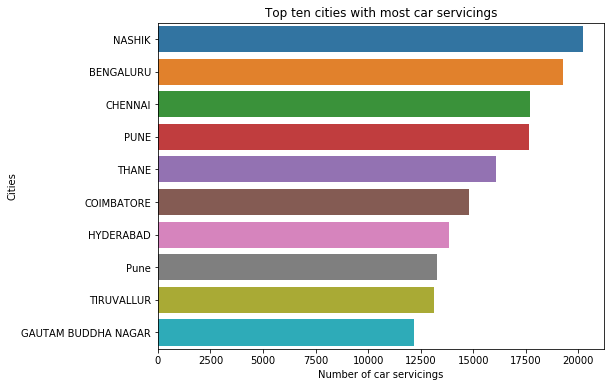

In [725]:
### Area with most number of car servicing

plt.figure(figsize=(8,6),edgecolor='b')
plt.xlabel('Number of car servicings')
plt.ylabel('Cities')
plt.title('Top ten cities with most car servicings')
sns.barplot(y=final_invoice_subset['City'].value_counts()[:10].index,
            x=final_invoice_subset['City'].value_counts()[:10].values)

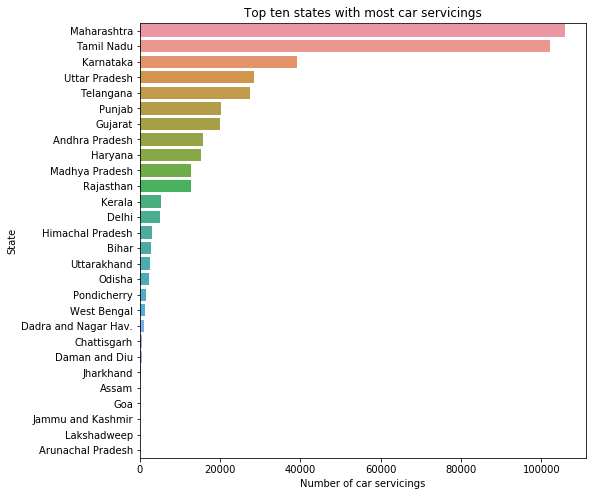

In [727]:
### State with most number of car servicing

plt.figure(figsize=(8,8),edgecolor='b')
plt.xlabel('Number of car servicings')
plt.ylabel('State')
plt.title('Top ten states with most car servicings')
sns.barplot(y=final_invoice_subset['State'].value_counts().index,
            x=final_invoice_subset['State'].value_counts().values)

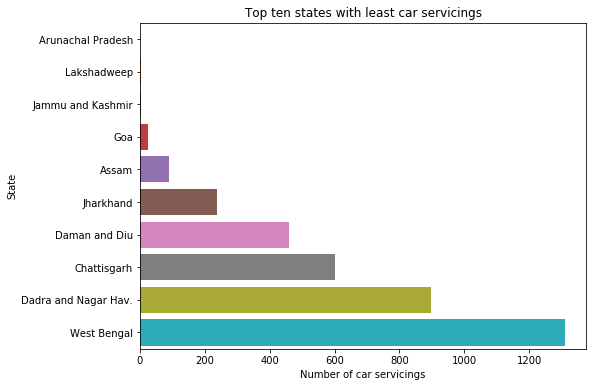

In [739]:
### State with least number of car servicing

plt.figure(figsize=(8,6),edgecolor='b')
plt.xlabel('Number of car servicings')
plt.ylabel('State')
plt.title('Top ten states with least car servicings')
sns.barplot(y=final_invoice_subset['State'].value_counts()[:-11:-1].index,
            x=final_invoice_subset['State'].value_counts()[:-11:-1].values)

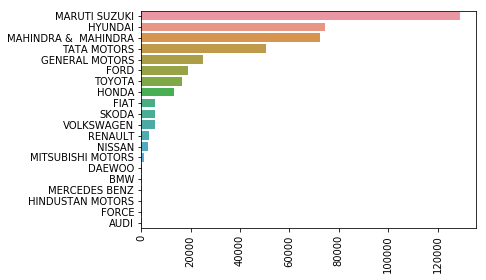

In [371]:
### Most popular make in the servicing centres overall

plt.xticks(rotation='vertical')
sns.barplot(y=final_invoice_subset['Make'].value_counts()[:20].index,
            x=final_invoice_subset['Make'].value_counts()[:20].values)

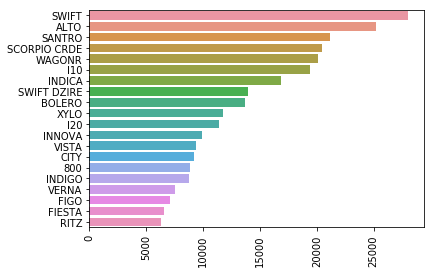

In [372]:
### Most popular model in the servicing centres overall

plt.xticks(rotation='vertical')
sns.barplot(y=final_invoice_subset['Model'].value_counts()[:20].index,
            x=final_invoice_subset['Model'].value_counts()[:20].values)

In [373]:
make_order_group = final_invoice_subset.groupby(['Make','Order Type']).size().sort_values(ascending=False)[:30]

In [374]:
make_order_group

Make                  Order Type       
MARUTI SUZUKI         Running Repairs      71264
MAHINDRA &  MAHINDRA  Running Repairs      39942
HYUNDAI               Running Repairs      39218
MARUTI SUZUKI         Paid Service         35118
TATA MOTORS           Running Repairs      30049
MAHINDRA &  MAHINDRA  Paid Service         21088
HYUNDAI               Paid Service         19446
GENERAL MOTORS        Running Repairs      13736
TATA MOTORS           Paid Service         12941
FORD                  Running Repairs      10765
MARUTI SUZUKI         Accidental           10448
TOYOTA                Running Repairs       9385
HONDA                 Running Repairs       7026
HYUNDAI               Accidental            6995
GENERAL MOTORS        Paid Service          6705
MAHINDRA &  MAHINDRA  Accidental            5677
FORD                  Paid Service          4776
MARUTI SUZUKI         SMC Redemption        4637
                      Mechanical            4005
HYUNDAI               SMC Red

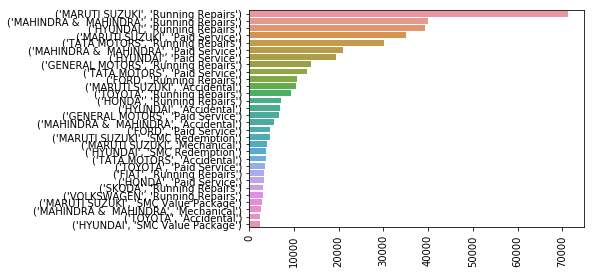

In [375]:
plt.xticks(rotation='vertical')
sns.barplot(x=make_order_group.values,
            y=make_order_group.index)

In [378]:
final_invoice_subset.head()

,Cust Type,Customer No.,District,Make,Model,Order Type,Total Amount,City,Year,State
0,Retail,67849,Maharashtra,GENERAL MOTORS,SPARK,Paid Service,4051,THANE,2014,Maharashtra
1,Retail,84419,Maharashtra,TATA MOTORS,INDICA,SMC Value Package,1001,THANE,2015,Maharashtra
2,Retail,81055,Maharashtra,MARUTI SUZUKI,ZEN,Running Repairs,233,THANE,2015,Maharashtra
3,Retail,84419,Maharashtra,TATA MOTORS,INDICA,SMC Redemption,0,THANE,2015,Maharashtra
4,Retail,18980,Maharashtra,HYUNDAI,SANTRO XING,Paid Service,2747,THANE,2015,Maharashtra


In [427]:
amount_state = final_invoice_subset.groupby(['State']).sum().sort_values(by='Total Amount',ascending=False)[:10]

In [428]:
amount_state

,Total Amount
State,
Tamil Nadu,525269058
Maharashtra,421710418
Karnataka,149571501
Telangana,139658743
Uttar Pradesh,95612157
Punjab,92661227
Gujarat,76421114
Andhra Pradesh,73294619
Madhya Pradesh,56732603


In [383]:
def currency(x, pos):
    'The two args are the value and tick position'    
    return '₹{:1.0f}Cr'.format(x*1e-8)

In [3]:
### Plotting the total amount received per state
import seaborn as sns

sns.barplot(x=amount_state['Total Amount'],
            y=amount_state.index)
ax.set(title='Top ten states with most revenue generation', xlabel='Total Revenue', ylabel='State')



NameError: name 'amount_state' is not defined

In [743]:
amount_state_bottom_10 = final_invoice_subset.groupby(['State']).sum().sort_values(by='Total Amount',ascending=False)[:-11:-1]

[Text(0, 0.5, 'State'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Top ten states with least revenue')]

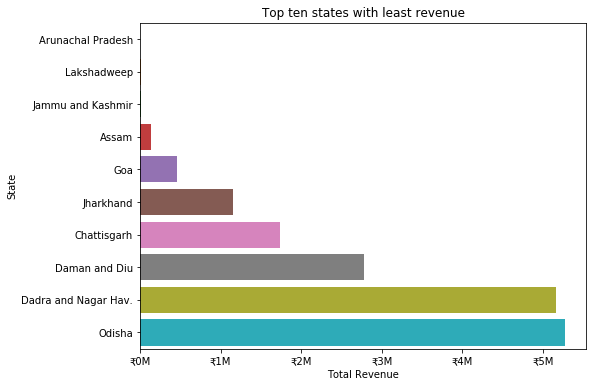

In [747]:
def currency_m(x, pos):
    'The two args are the value and tick position'    
    return '₹{:1.0f}M'.format(x*1e-6)

### Plotting the total amount received per state
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(8,6))
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

sns.barplot(x=amount_state_bottom_10['Total Amount'],
            y=amount_state_bottom_10.index)
ax.set(title='Top ten states with least revenue', xlabel='Total Revenue', ylabel='State')

In [385]:
final_invoice_subset.groupby(['State']).sum().sort_values(by='Total Amount',ascending=True)

,Total Amount
State,
Arunachal Pradesh,480
Lakshadweep,10147
Jammu and Kashmir,17333
Assam,133033
Goa,459177
Jharkhand,1151062
Chattisgarh,1742868
Daman and Diu,2780352
Dadra and Nagar Hav.,5164453


In [328]:
final_invoice['Year'] = pd.to_datetime(final_invoice['JobCard Date']).dt.year

In [331]:
final_invoice['Year'] = final_invoice['Year'].astype(str)

In [386]:
invoice_subset2 = final_invoice.drop(['Job Card No','Pin code'],axis=1)

In [387]:
invoice_subset2['Total Amt Wtd Tax.'] = invoice_subset2['Total Amt Wtd Tax.'].astype(int)

In [943]:
# invoice_new[invoice_new['Order Type'] == 'Accidental'].groupby(['Make']).size()/invoice_new

(invoice_new.groupby(['Make','Order Type']).size()/invoice_new[['Order Type','Make']].groupby(['Make']).size()*100)

Make         Order Type       
AUDI         Accidental           26.562500
             Mechanical            3.125000
             Paid Service         13.020833
             Running Repairs      57.291667
BMW          Accidental           23.318386
             Mechanical            1.793722
             Paid Service         11.659193
             Running Repairs      63.228700
DAEWOO       Accidental            3.363914
             Mechanical            3.058104
             Paid Service         23.853211
             Repeat Order          1.223242
             Running Repairs      66.666667
             SMC Redemption        1.223242
             SMC Value Package     0.611621
FIAT         Accidental            9.798016
             Mechanical            3.171510
             Paid Service         23.883770
             Repeat Order          1.098512
             Running Repairs      60.063785
             SMC Redemption        1.187101
             SMC Value Package     0.797307
F

In [945]:
(invoice_new.groupby(['State','Order Type']).size()/invoice_new[['Order Type','State']].groupby(['State']).size()*100)

State                 Order Type       
Andhra Pradesh        Accidental             9.399544
                      Mechanical             3.274639
                      Paid Service          19.109450
                      Repeat Order           0.177350
                      Running Repairs       64.929060
                      SMC Redemption         1.919179
                      SMC Value Package      1.190778
Arunachal Pradesh     Running Repairs      100.000000
Assam                 Accidental             7.692308
                      Paid Service          82.417582
                      Running Repairs        9.890110
Bihar                 Accidental             5.702364
                      Mechanical             3.372740
                      Paid Service          35.674548
                      Repeat Order           0.034771
                      Running Repairs       55.076495
                      SMC Redemption         0.034771
                      SMC Value Package   

In [954]:
invoice_new[invoice_new['State'] == 'Delhi'].groupby(['State','Order Type','Year']).size()/invoice_new[['Order Type','State','Year']].groupby(['State']).size()*100

State  Order Type         Year
Delhi  Accidental         2012     0.039131
                          2013     0.763060
                          2014     3.384856
                          2015    11.211113
                          2016     2.543534
       Mechanical         2016     0.528272
       Paid Service       2013     0.743494
                          2014     7.297985
                          2015     5.634905
                          2016     2.484837
       Repeat Order       2013     0.195656
                          2014     1.017413
                          2015     0.254353
                          2016     0.019566
       Running Repairs    2012     0.019566
                          2013     5.263158
                          2014    21.522207
                          2015    12.972021
                          2016     6.143612
       SMC Redemption     2013     0.489141
                          2014     5.439249
                          2015     4.539229
 

In [940]:
invoice_new[invoice_new['State'] == 'Delhi'].groupby(['Make']).size()/invoice_new.groupby(['Make']).size()*100

Make
AUDI                    0.520833
BMW                     1.793722
DAEWOO                  0.305810
FIAT                    0.903614
FORCE                        NaN
FORD                    0.521138
GENERAL MOTORS          1.163302
HINDUSTAN MOTORS             NaN
HONDA                   1.657007
HYUNDAI                 1.902757
JEEP                         NaN
LAND ROVER              5.882353
MAHINDRA &  MAHINDRA    0.984132
MARUTI SUZUKI           1.354921
MERCEDES BENZ           1.363636
MITSUBISHI MOTORS       0.552486
MORRIS                       NaN
NISSAN                  0.616389
PORCHE                       NaN
PREMIER AUTOMOBILES          NaN
RENAULT                 0.509879
SAN MOTORS                   NaN
SKODA                   0.630744
SONALIKA                     NaN
TATA MOTORS             0.506720
TOYOTA                  1.232703
VOLKSWAGEN              0.400364
VOLVO                   5.882353
dtype: float64

In [955]:
(invoice_new.groupby(['Month','Order Type']).size()/invoice_new[['Order Type','Month']].groupby(['Month']).size()*100)

Month  Order Type       
Apr    Accidental            9.093097
       Mechanical           41.224244
       Paid Service         14.742066
       Repeat Order          0.523387
       Running Repairs      29.526245
       SMC Redemption        2.869604
       SMC Value Package     2.021357
Aug    Accidental            8.574714
       Paid Service         29.494080
       Repeat Order          0.545552
       Running Repairs      57.390645
       SMC Redemption        2.441530
       SMC Value Package     1.546140
       WBW Order             0.002446
       Workshop Damage       0.004893
Dec    Accidental            9.015665
       Paid Service         23.818319
       Repeat Order          0.998700
       Running Repairs      60.465832
       SMC Redemption        3.700664
       SMC Value Package     1.997401
       Workshop Damage       0.003420
Feb    Accidental            8.817268
       Paid Service         24.840326
       Repeat Order          0.628869
       Running Repairs   

In [976]:
((invoice_new.groupby(['State']).sum()['Total Amt Wtd Tax.']/1847738407)*100).sort_values(ascending=False)
# invoice_new[['Total Amt Wtd Tax.']].sum()

State
Tamil Nadu              28.427674
Maharashtra             22.823059
Karnataka                8.094842
Telangana                7.558361
Uttar Pradesh            5.174551
Punjab                   5.014846
Gujarat                  4.135927
Andhra Pradesh           3.966721
Madhya Pradesh           3.070381
Haryana                  3.056100
Rajasthan                2.480267
Delhi                    1.709254
Kerala                   1.371207
Bihar                    0.719779
Uttarakhand              0.449117
Himachal Pradesh         0.422642
Pondicherry              0.330662
West Bengal              0.289101
Odisha                   0.285353
Dadra and Nagar Hav.     0.279501
Daman and Diu            0.150473
Chattisgarh              0.094324
Jharkhand                0.062296
Goa                      0.024851
Assam                    0.007200
Jammu and Kashmir        0.000938
Lakshadweep              0.000549
Arunachal Pradesh        0.000026
Name: Total Amt Wtd Tax., dtype: float64

In [395]:
delhi_rev = invoice_subset2[invoice_subset2['State'] == 'Delhi'].groupby(['Year']).sum()

In [404]:
delhi_rev

,Total Amt Wtd Tax.
Year,
2012,51040
2013,1422669
2014,7900641
2015,17087792
2016,5120393


[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Revenue at Delhi service centre')]

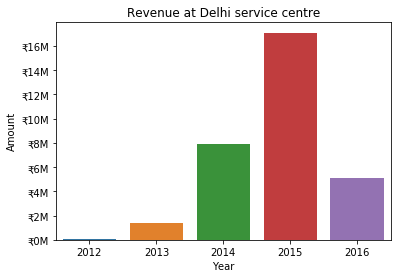

In [752]:
def currency_d(x, pos):
    'The two args are the value and tick position'    
    return '₹{:1.0f}M'.format(x*1e-6)

fig, ax = plt.subplots()
formatter = FuncFormatter(currency_d)
ax.yaxis.set_major_formatter(formatter)

sns.barplot(y=delhi_rev['Total Amt Wtd Tax.'],
            x=delhi_rev.index)
ax.set(title='Revenue at Delhi service centre', xlabel='Year', ylabel='Amount')

In [753]:
kerala_rev = invoice_subset2[invoice_subset2['State'] == 'Kerala'].groupby(['Year']).sum()

In [754]:
kerala_rev

,Total Amt Wtd Tax.
Year,
2013,1699457
2014,9539229
2015,4017397
2016,10080236


[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Revenue at Kerala service centre')]

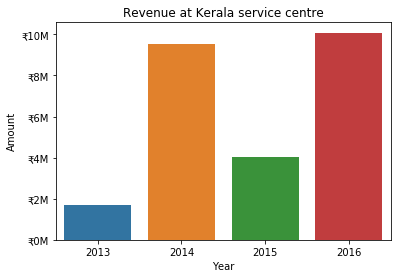

In [755]:
def currency_k(x, pos):
    'The two args are the value and tick position'    
    return '₹{:1.0f}M'.format(x*1e-6)

fig, ax = plt.subplots()
formatter = FuncFormatter(currency_d)
ax.yaxis.set_major_formatter(formatter)

sns.barplot(y=kerala_rev['Total Amt Wtd Tax.'],
            x=kerala_rev.index)
ax.set(title='Revenue at Kerala service centre', xlabel='Year', ylabel='Amount')

In [423]:
invoice_subset2[invoice_subset2['State'] == 'Tamil Nadu'].groupby(['Year']).sum()

,Total Amt Wtd Tax.
Year,
2012,13324515
2013,52927472
2014,78346832
2015,173685103
2016,206985136


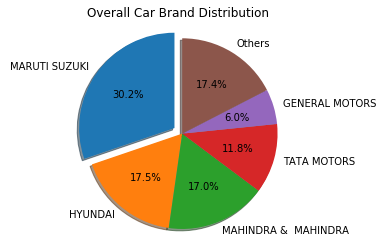

In [477]:
top_5_make = invoice_subset2['Make'].value_counts()[:5]
make_others = pd.Series(data=invoice_subset2['Make'].value_counts()[5:].sum(),index=['Others'])

make_distr = top_5_make.append(make_others)
explode = [0.1,0,0,0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(make_distr.values,explode = explode, labels=make_distr.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set(title='Overall Car Brand Distribution')
plt.show()

In [481]:
invoice_subset2[invoice_subset2['Make']== 'MARUTI SUZUKI']['Model'].value_counts()[:5]

SWIFT          30310
ALTO           27178
WAGONR         21666
SWIFT DZIRE    15148
800             9573
Name: Model, dtype: int64

In [489]:
invoice_subset2.dropna(axis=0,inplace=True)

In [519]:
a = invoice_subset2.groupby(['State','Make']).size()

top10_state_most_ser = final_invoice_subset['State'].value_counts().index[:10]


In [536]:
sub = invoice_subset2[['State','Make']][invoice_subset2['State'].isin(top10_state_most_ser)]

In [540]:
sub = sub[['State','Make']][sub['Make'].isin(top_5_make.index)]

In [544]:
mosaic = sub.groupby(['State','Make']).size().unstack()

In [553]:
mosaic.describe()

Make,GENERAL MOTORS,HYUNDAI,MAHINDRA & MAHINDRA,MARUTI SUZUKI,TATA MOTORS
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2274.900000,6897.200000,6335.600000,11625.900000,4748.200000
std,2150.599475,6061.746133,7408.650262,9816.663072,4787.774913
min,546.000000,1721.000000,1683.000000,3366.000000,789.000000
25%,1150.750000,3527.250000,2091.750000,6300.750000,1827.750000
50%,1311.000000,4970.500000,2899.000000,8055.000000,3231.500000
75%,2290.500000,6150.000000,5029.500000,11173.000000,4164.500000
max,7195.000000,18522.000000,21792.000000,34271.000000,15390.000000


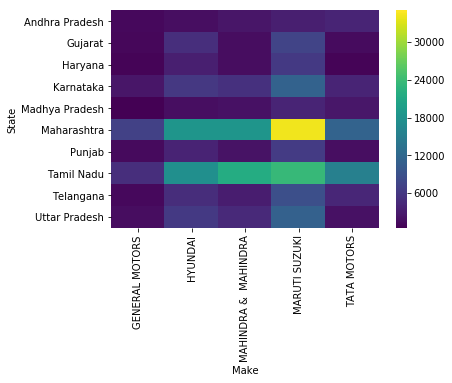

In [779]:
sns.heatmap(data=mosaic,vmin=500,vmax=35000,cmap='viridis')

In [563]:
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [564]:
final_invoice['Month'] = pd.to_datetime(final_invoice['Invoice Date']).dt.month.map(monthDict)

In [784]:
invoice_new = final_invoice.copy()

In [785]:
invoice_new = invoice_new.drop(['CITY','District','Pin code','Plant','Regn No'],axis=1)

In [786]:
maha_visits_monthly = invoice_new['Month'][invoice_new['State'] == 'Maharashtra'].value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [787]:
maha_visits_monthly

Jan     7956
Feb     7966
Mar     8945
Apr     8854
May     9281
Jun     9309
Jul     9580
Aug     9426
Sep     9067
Oct    10152
Nov     6984
Dec     8430
Name: Month, dtype: int64

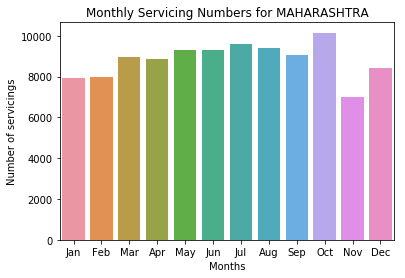

In [788]:
fig1, ax2 = plt.subplots()
sns.barplot(x = maha_visits_monthly.index,
              y = maha_visits_monthly.values)

ax2.set(title='Monthly Servicing Numbers for MAHARASHTRA',xlabel='Months',ylabel='Number of servicings')
plt.show()

In [789]:
TN_visits_monthly = invoice_new['Month'][invoice_new['State'] == 'Tamil Nadu'].value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [790]:
TN_visits_monthly

Jan     6503
Feb     8032
Mar     7392
Apr     7925
May     8595
Jun     8903
Jul    11899
Aug     9608
Sep    10950
Oct    10184
Nov     5461
Dec     6802
Name: Month, dtype: int64

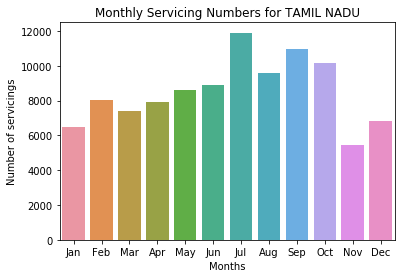

In [791]:
fig1, ax2 = plt.subplots()
sns.barplot(x = TN_visits_monthly.index,
              y = TN_visits_monthly.values)

ax2.set(title='Monthly Servicing Numbers for TAMIL NADU',xlabel='Months',ylabel='Number of servicings')
plt.show()

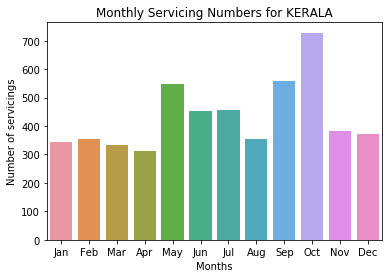

In [792]:
ke_visits_monthly = invoice_new['Month'][invoice_new['State'] == 'Kerala'].value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

fig1, ax2 = plt.subplots()
sns.barplot(x = ke_visits_monthly.index,
              y = ke_visits_monthly.values)

ax2.set(title='Monthly Servicing Numbers for KERALA',xlabel='Months',ylabel='Number of servicings')
plt.show()

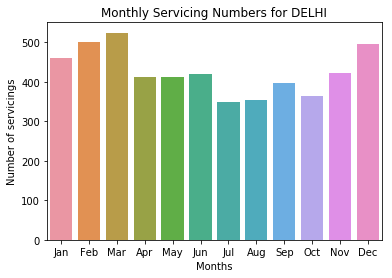

In [793]:
de_visits_monthly = invoice_new['Month'][invoice_new['State'] == 'Delhi'].value_counts().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

fig1, ax2 = plt.subplots()
sns.barplot(x = de_visits_monthly.index,
              y = de_visits_monthly.values)

ax2.set(title='Monthly Servicing Numbers for DELHI',xlabel='Months',ylabel='Number of servicings')
plt.show()

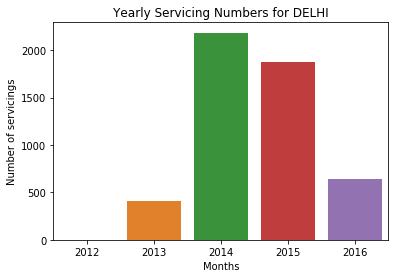

In [794]:
de_yearly_custs = invoice_new['Year'][invoice_new['State'] == 'Delhi'].value_counts().sort_index()

fig1, ax2 = plt.subplots()
sns.barplot(x = de_yearly_custs.index,
              y = de_yearly_custs.values)

ax2.set(title='Yearly Servicing Numbers for DELHI',xlabel='Months',ylabel='Number of servicings')
plt.show()

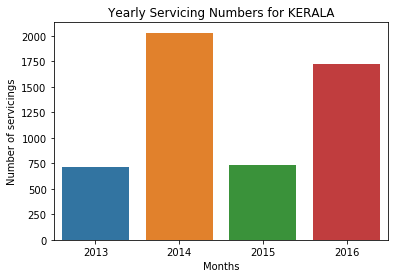

In [795]:
ke_yearly_custs = invoice_new['Year'][invoice_new['State'] == 'Kerala'].value_counts().sort_index()

fig1, ax2 = plt.subplots()
sns.barplot(x = ke_yearly_custs.index,
            y = ke_yearly_custs.values)

ax2.set(title='Yearly Servicing Numbers for KERALA',xlabel='Months',ylabel='Number of servicings')
plt.show()

[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Top 10 states with highest mean revenue')]

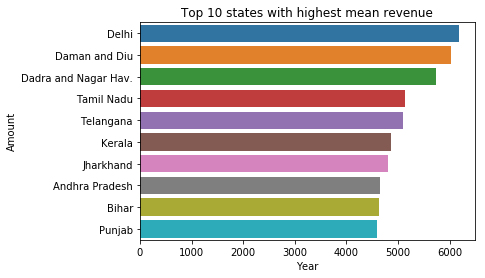

In [796]:
mean_spend_state = invoice_new.groupby(['State']).mean()['Total Amt Wtd Tax.'].sort_values(ascending=False)[1:11]

# def currency_me(x, pos):
#     'The two args are the value and tick position'    
#     return '₹{:1.0f}M'.format(x*1e-6)

fig, ax = plt.subplots()
# formatter = FuncFormatter(currency_d)
# ax.yaxis.set_major_formatter(formatter)

sns.barplot(x=mean_spend_state.values,
            y=mean_spend_state.index)
ax.set(title='Top 10 states with highest mean revenue', xlabel='Year', ylabel='Amount')

In [797]:
invoice_new.groupby(['State']).mean()['Total Amt Wtd Tax.'].sort_values(ascending=False)[1:11]

State
Delhi                   6179.691677
Daman and Diu           6031.555727
Dadra and Nagar Hav.    5745.069911
Tamil Nadu              5137.348642
Telangana               5104.368146
Kerala                  4873.764326
Jharkhand               4816.640209
Andhra Pradesh          4642.876623
Bihar                   4624.793328
Punjab                  4592.814019
Name: Total Amt Wtd Tax., dtype: float64

In [798]:
invoice_new['Total Amt Wtd Tax.'] = invoice_new['Total Amt Wtd Tax.'].astype(int)

[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Service Type with Mean amount values')]

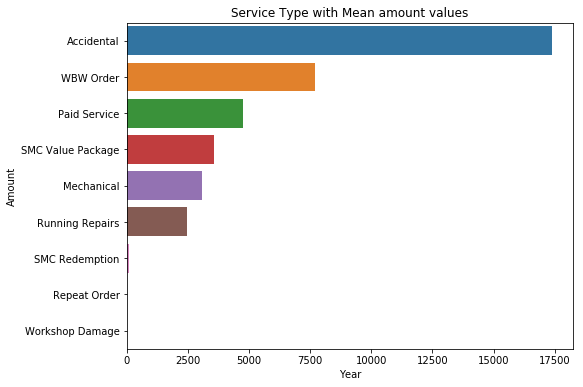

In [799]:
order_type_rev = invoice_new.groupby(['Order Type']).mean()['Total Amt Wtd Tax.'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x=order_type_rev.values,
            y=order_type_rev.index)
ax.set(title='Service Type with Mean amount values', xlabel='Year', ylabel='Amount')

In [800]:
invoice_new['JobCard Date'] = pd.to_datetime(invoice_new['JobCard Date'])

In [801]:
invoice_new['Invoice Date'] = pd.to_datetime(invoice_new['Invoice Date'])

In [802]:
invoice_new['Invoice Time'] = final_invoice_copy1['Invoice Time']

In [803]:
invoice_new['JobCard Time'] = final_invoice_copy1['JobCard Time']

In [804]:
invoice_new['Invoice Date Time'] = invoice_new['Invoice Date'].astype(str).str.cat(invoice_new[['Invoice Time']].astype(str),sep=' ')

In [805]:
invoice_new['JobCard Date Time'] = invoice_new['JobCard Date'].astype(str).str.cat(invoice_new[['JobCard Time']].astype(str), sep=' ')

In [807]:
invoice_new.head()

,Cust Type,Customer No.,Invoice Date,Job Card No,JobCard Date,Make,Model,Order Type,Total Amt Wtd Tax.,City,Year,State,Month,Invoice Time,JobCard Time,Invoice Date Time,JobCard Date Time
0,Retail,67849,2015-01-02,168303,2014-12-13,GENERAL MOTORS,SPARK,Paid Service,4051,THANE,2014,Maharashtra,Jan,11:30:36,14:29:43,2015-01-02 11:30:36,2014-12-13 14:29:43
1,Retail,84419,2015-01-03,173997,2015-01-02,TATA MOTORS,INDICA,SMC Value Package,1001,THANE,2015,Maharashtra,Jan,10:07:32,14:12:18,2015-01-03 10:07:32,2015-01-02 14:12:18
2,Retail,81055,2015-01-03,173889,2015-01-02,MARUTI SUZUKI,ZEN,Running Repairs,233,THANE,2015,Maharashtra,Jan,11:12:57,11:40:44,2015-01-03 11:12:57,2015-01-02 11:40:44
3,Retail,84419,2015-01-03,174158,2015-01-03,TATA MOTORS,INDICA,SMC Redemption,0,THANE,2015,Maharashtra,Jan,11:40:44,10:12:32,2015-01-03 11:40:44,2015-01-03 10:12:32
4,Retail,18980,2015-01-03,173860,2015-01-02,HYUNDAI,SANTRO XING,Paid Service,2747,THANE,2015,Maharashtra,Jan,12:07:17,10:45:42,2015-01-03 12:07:17,2015-01-02 10:45:42


In [808]:
invoice_new['Invoice Date Time'] = pd.to_datetime(invoice_new['Invoice Date Time'])

invoice_new['JobCard Date Time'] = pd.to_datetime(invoice_new['JobCard Date Time'])

invoice_new['ServiceTime'] = invoice_new['Invoice Date Time']-invoice_new['JobCard Date Time']

In [809]:
invoice_new['ServiceTime'].describe()

count                     461849
mean      3 days 11:22:21.975591
std      11 days 13:35:56.177805
min            -1 days +23:59:27
25%              0 days 02:37:58
50%              0 days 08:23:11
75%              2 days 07:17:24
max            740 days 09:15:41
Name: ServiceTime, dtype: object

In [810]:
invoice_new['ServiceTime_category']=None

In [811]:
invoice_new.loc[invoice_new['ServiceTime']<=pd.Timedelta(hours=72),'ServiceTime_category']='fast'

In [812]:
invoice_new.loc[invoice_new['ServiceTime']>pd.Timedelta(hours=72),'ServiceTime_category']='slow'

In [813]:
invoice_new.head()

,Cust Type,Customer No.,Invoice Date,Job Card No,JobCard Date,Make,Model,Order Type,Total Amt Wtd Tax.,City,Year,State,Month,Invoice Time,JobCard Time,Invoice Date Time,JobCard Date Time,ServiceTime,ServiceTime_category
0,Retail,67849,2015-01-02,168303,2014-12-13,GENERAL MOTORS,SPARK,Paid Service,4051,THANE,2014,Maharashtra,Jan,11:30:36,14:29:43,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,slow
1,Retail,84419,2015-01-03,173997,2015-01-02,TATA MOTORS,INDICA,SMC Value Package,1001,THANE,2015,Maharashtra,Jan,10:07:32,14:12:18,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,fast
2,Retail,81055,2015-01-03,173889,2015-01-02,MARUTI SUZUKI,ZEN,Running Repairs,233,THANE,2015,Maharashtra,Jan,11:12:57,11:40:44,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,fast
3,Retail,84419,2015-01-03,174158,2015-01-03,TATA MOTORS,INDICA,SMC Redemption,0,THANE,2015,Maharashtra,Jan,11:40:44,10:12:32,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,fast
4,Retail,18980,2015-01-03,173860,2015-01-02,HYUNDAI,SANTRO XING,Paid Service,2747,THANE,2015,Maharashtra,Jan,12:07:17,10:45:42,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,fast


In [817]:
invoice_new.groupby(['State','ServiceTime_category']).size().sort_values(ascending=True)

State                 ServiceTime_category
Jammu and Kashmir     slow                        1
Lakshadweep           slow                        1
Arunachal Pradesh     fast                        1
Lakshadweep           fast                        2
Jammu and Kashmir     fast                        3
Assam                 slow                        4
Goa                   slow                       11
                      fast                       15
Assam                 fast                       87
Daman and Diu         slow                       89
Jharkhand             slow                      103
                      fast                      136
Chattisgarh           slow                      178
Dadra and Nagar Hav.  slow                      190
Odisha                slow                      346
Pondicherry           slow                      367
Daman and Diu         fast                      372
Chattisgarh           fast                      424
Uttarakhand          

In [2]:
cust_data = pd.read_csv('Customer Data Mod.csv')

C:\Users\shami\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cust_data = cust_data.drop(['Unnamed: 0'],axis=1)

Text(0.5, 1.0, 'Data Origin Distribution')

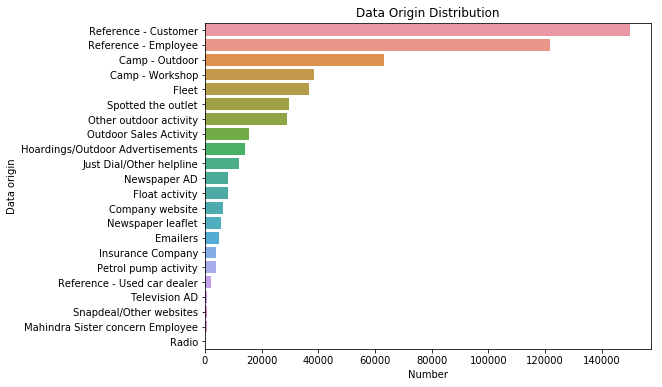

In [4]:
plt.figure(figsize=(8,6))
sns.barplot(y=cust_data['Data Origin'].value_counts().index,x=cust_data['Data Origin'].value_counts().values)
plt.xlabel('Number')
plt.ylabel('Data origin')
plt.title('Data Origin Distribution')

In [5]:
plant_info = pd.read_excel('Plant Master.xlsx')

In [6]:
plant_info.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


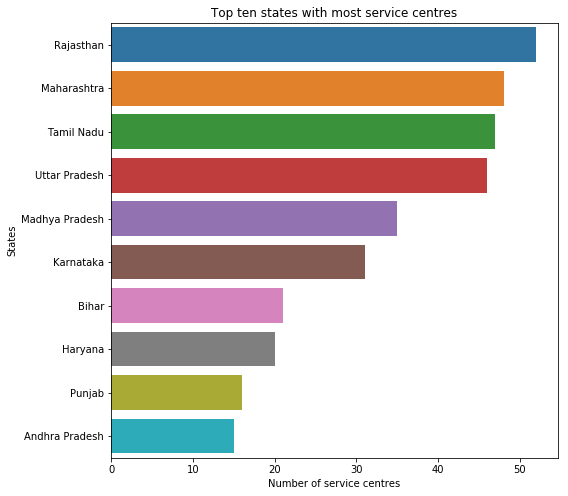

In [7]:
### State with most number of service centres

plt.figure(figsize=(8,8),edgecolor='b')
plt.xlabel('Number of service centres')
plt.ylabel('States')
plt.title('Top ten states with most service centres')
sns.barplot(y=plant_info['State'].value_counts()[:10].index,
            x=plant_info['State'].value_counts()[:10].values)

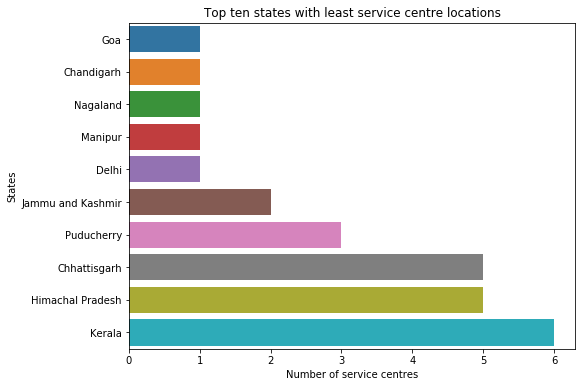

In [9]:
### State with most number of service centres

plt.figure(figsize=(8,6),edgecolor='b')
plt.xlabel('Number of service centres')
plt.ylabel('States')
plt.title('Top ten states with least service centre locations')
sns.barplot(y=plant_info['State'].value_counts()[:-11:-1].index,
            x=plant_info['State'].value_counts()[:-11:-1].values)